# Data Citra

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [6]:
img = cv.imread('buahnaga.png')

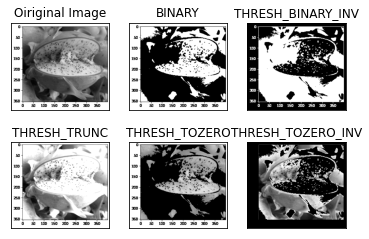

In [7]:
gray_image = cv.imread('buahnaga.png',0)

ret,thresh_binary = cv.threshold(gray_image,127,255,cv.THRESH_BINARY)
ret,thresh_binary_inv = cv.threshold(gray_image,127,255,cv.THRESH_BINARY_INV)
ret,thresh_trunc = cv.threshold(gray_image,127,255,cv.THRESH_TRUNC)
ret,thresh_tozero = cv.threshold(gray_image,127,255,cv.THRESH_TOZERO)
ret,thresh_tozero_inv = cv.threshold(gray_image,127,255,cv.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

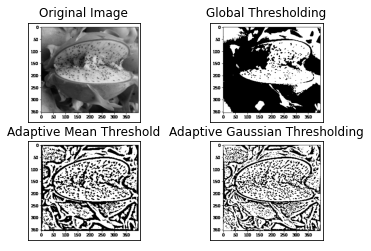

In [8]:
ret,thresh_global = cv.threshold(gray_image,127,255,cv.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)

thresh_gaussian = cv.adaptiveThreshold(gray_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# Data Text

Tokenization adalah salah satu bagian penting dari proses awal pengolahan data teks. Pengolahan data teks dimulai dengan proses preprocessing yang terkadang disebut juga sebagai data wrangling
Definisi secara singkatnya adalah mengelompokkan kata-kata


TOKENISASI DENGAN LIBRARY TF

import library

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

membuat tokenizer

Oov token berfungsi untuk mengggantikan kata yang sulit dideteksi oleh mesin dan diganti sesuai oov token

In [10]:
tokenizer = Tokenizer(num_words= 15, oov_token= '-')

membuat teks 

In [19]:
teks = ['saya Sakinah Yunus',
        'mahasiswi Sistem Informasi',
        'Fakultas Matematika dan Ilmu Pengetahuan Alam']

In [20]:
tokenizer.fit_on_texts(teks)

kemudian dimasukkan ke sequences

In [21]:
sequences = tokenizer.texts_to_sequences(teks)

In [22]:
print(tokenizer.word_index)

{'-': 1, 'saya': 2, 'sakinah': 3, 'yunus': 4, 'mahasiswi': 5, 'sistem': 6, 'informasi': 7, 'fakultas': 8, 'matematika': 9, 'dan': 10, 'ilmu': 11, 'pengetahuan': 12, 'alam': 13}


hasil tokenisasi akan diseragamkan ukurannya menggunakan padding sequences

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)

In [24]:
print(sequences_samapanjang)

[[ 0  0  0  2  3  4]
 [ 0  0  0  5  6  7]
 [ 8  9 10 11 12 13]]


Oleh karena jumlah kata pada ketiga kalimat tidak sama, dimana kalimat pertama dan kedua terdiri dari 3 kata sedangkan kalimat ketiga terdiri dari 6 kata, maka pada kalimat pertama dan kedua ditambah 0 agar ukuran ketiga kalimat seragam.

In [25]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5)

padding = 'post' berfungsi agar angka 0 ditambahkan setelah kalimat

In [26]:
print(sequences_samapanjang)

[[ 2  3  4  0  0]
 [ 5  6  7  0  0]
 [ 9 10 11 12 13]]


In [27]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5,
                                      truncating='post')

In [28]:
print(sequences_samapanjang)

[[ 2  3  4  0  0]
 [ 5  6  7  0  0]
 [ 8  9 10 11 12]]


TOKENISASI MENGGUNAKAN NLTK

mengelompokkan kata-kata yang berasal dri suatu kalimat agar mesin dapat membacanya

In [29]:
# Installing Modules for Google Colab
!pip install unidecode
!pip install pyLDAvis
!pip install textblob
!pip install sastrawi
!pip install twython
!pip install tweepy
!pip install spacy
!pip install python-crfsuite
!python -m spacy download en
!python -m spacy download xx
!python -m spacy download en_core_web_sm
import nltk
nltk.download('popular')

     |████████████████████████████████| 235 kB 13.6 MB/s 
     |████████████████████████████████| 1.7 MB 14.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 42.5 MB/s 
     |████████████████████████████████| 15.7 MB 187 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=b9320b32620264eede9f6bf09662fe9e2d0c5ef2c5cb46a62a3bd132fcecfcea
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
E

     |████████████████████████████████| 209 kB 11.4 MB/s 
     |████████████████████████████████| 743 kB 14.7 MB/s 
     |████████████████████████████████| 12.0 MB 16.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 3.7 MB 13.5 MB/s 
  Created wheel for xx-ent-wiki-sm: filename=xx_ent_wiki_sm-2.2.0-py3-none-any.whl size=3732134 sha256=98c042b3df6bc1f85717f244a894ac12990d60799bf390db6fe72d27192a1008
  Stored in directory: /tmp/pip-ephem-wheel-cache-yh0jynbu/wheels/87/31/20/7f7576bcd0b6ee9c7056c60e28d9e6a40143c553cb5fecc9e2
Successfully built xx-ent-wiki-sm
✔ Download and installation successful
You can now load the model via spacy.load('xx_ent_wiki_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/x

True

In [30]:
T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
Word_Tokens = nltk.word_tokenize(T)
print(Word_Tokens) # tokenisasi kata

['Hello', ',', 'Mr.', 'Man', '.', 'He', 'smiled', '!', '!', 'This', ',', 'i.e', '.', 'that', ',', 'is', 'it', '.']


In [31]:
print(T.split())

['Hello,', 'Mr.', 'Man.', 'He', 'smiled!!', 'This,', 'i.e.', 'that,', 'is', 'it.']


In [32]:
Sentence_Tokens = nltk.sent_tokenize(T)
print(Sentence_Tokens) # Tokenisasi kalimat

['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


In [33]:
T = "how are you\n are you okay?"
print(T)
Sentence_Tokens = nltk.sent_tokenize(T)
print(Sentence_Tokens)

how are you
 are you okay?
['how are you\n are you okay?']


TOKENISASI MENGGUNAKAN SPACY

In [36]:
# Contoh Tokenisasi dalam bahasa Indonesia dengan Spacy
from spacy.lang.id import Indonesian
nlp_id = Indonesian()  # Language Model

teks = 'Pagi tadi, saya sedang kuliah. Sedangkan temanku memasak di dapur'
tokenS_id = nlp_id(teks)
#T = []
#for token in tokenS_id:
#    T.append(token)
print([t for t in tokenS_id])

[Pagi, tadi, ,, saya, sedang, kuliah, ., Sedangkan, temanku, memasak, di, dapur]


In [37]:
# Jika menggunakan Language model English:
from spacy.lang.en import English
nlp_en = English()
tokenS_en = nlp_en(teks)
print([token.text for token in tokenS_en])

['Pagi', 'tadi', ',', 'saya', 'sedang', 'kuliah', '.', 'Sedangkan', 'temanku', 'memasak', 'di', 'dapur']


# Data Audio

Data Audio terhitung sebagai data sinyal dan pengambilan fitur-fiturnya kurang lebih sama dengan data citra yaitu dalam bentuk array.

Preprocessing pengolahan data audio dengan cara gelombang divisualisasikan data plot. Output plot yang berupa gambar kemudian digunakan lagi proses seperti data citra

In [38]:
import librosa
audio_data = '/content/drive/MyDrive/audio/mixkit-retro-game-emergency-alarm-1000.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


In [39]:
librosa.load(audio_data, sr=44100)

(array([-0.00059509, -0.00045776,  0.00045776, ..., -0.00061035,
        -0.00067139, -0.00061035], dtype=float32), 44100)

In [40]:
import IPython.display as ipd
ipd.Audio(audio_data)

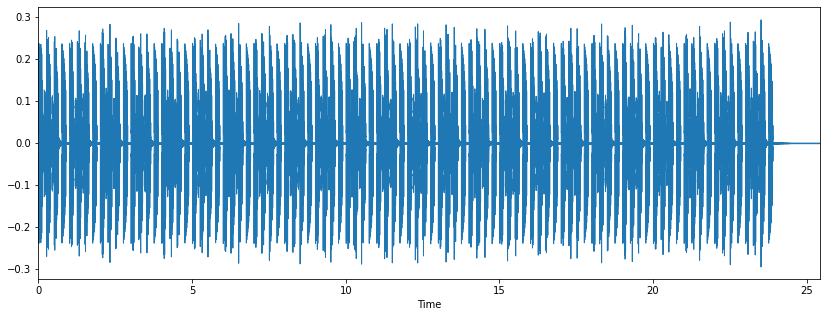

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

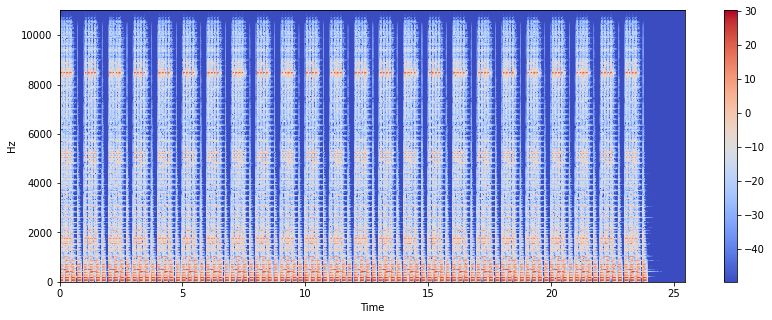

In [42]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [43]:
import soundfile as sf
sound, samplerate = sf.read('/content/drive/MyDrive/audio/mixkit-retro-game-emergency-alarm-1000.wav')
sf.write('newFile.ogg', sound, samplerate)

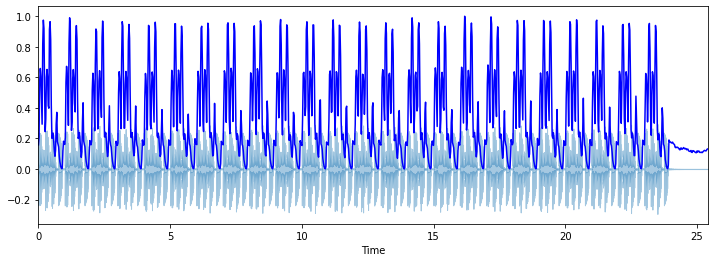

In [44]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

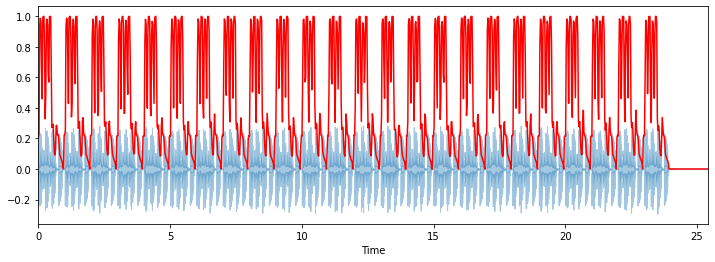

In [45]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

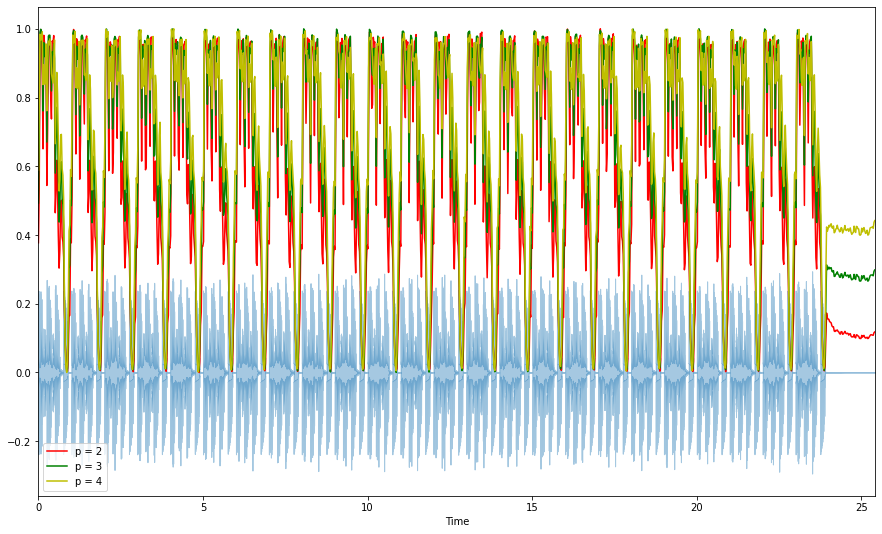

In [46]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

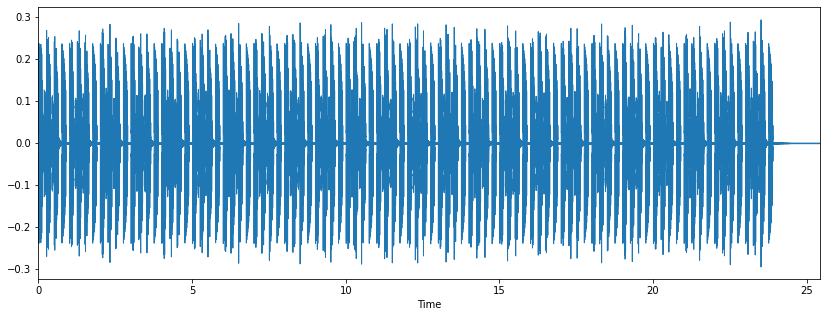

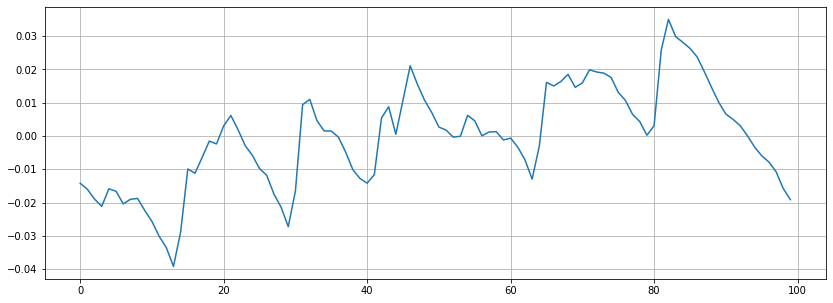

In [47]:
x, sr = librosa.load('/content/drive/MyDrive/audio/mixkit-retro-game-emergency-alarm-1000.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

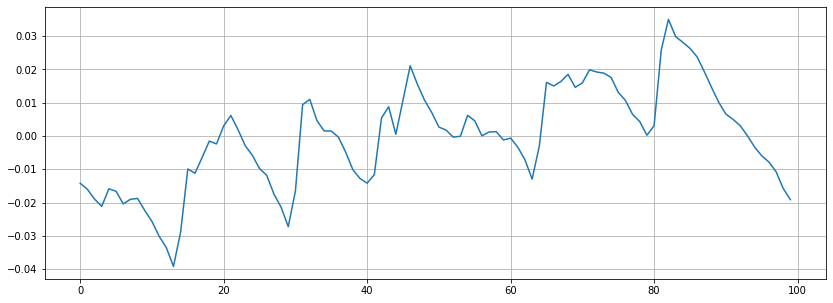

In [48]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [49]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

10


(20, 1095)


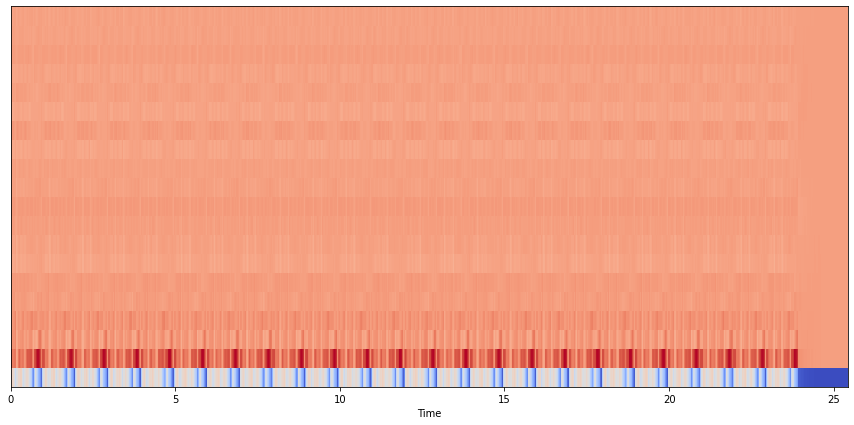

In [50]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')